/tmp/ipykernel_1051890/3612343350.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  discrete_cmap = mpl.cm.get_cmap("bwr", 11)


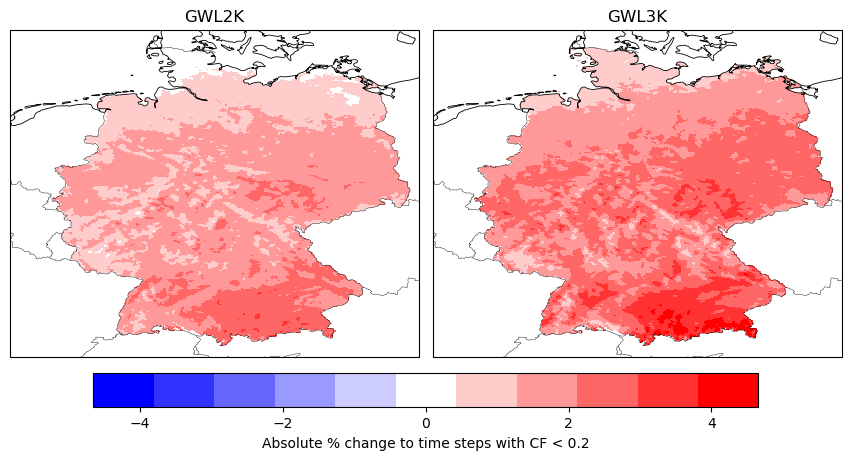

Mean value historical: 25.389208712457002%
Mean value GWL2K: 26.898675166591605%
Mean value GWL3K: 27.551780895018236%
Mean difference GWL2K: 1.5094664541346676%
Mean difference GWL3K: 2.1625721825614765%


In [1]:
#Dunkelflaute absolute percentage change when compared to historical for the entire year
#Values are higher if we use 5MW turbines
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import json

proj = ccrs.PlateCarree()
fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 4.5),
    subplot_kw=dict(projection=proj),
    layout='compressed',
)
discrete_cmap = mpl.cm.get_cmap("bwr", 11)
discrete_cmap.set_bad(color=(0, 0, 0, 0))   
with open("Dunkelflaute/Germany.json", "r", encoding="utf-8") as file:
    file_locations=json.load(file)
    data_location=file_locations["3_3MW"]["CEU-3_MPI-M-MPI-ESM1-2-HR_CLMcom-Hereon-CCLM-6-0-clm2_Dunkelflaute"]
    file_1=xr.open_dataset(data_location["historical"]["Year"]["timmean"])
    file_2=xr.open_dataset(data_location["ssp370-GWL2K"]["Year"]["timmean"])
    file_3=xr.open_dataset(data_location["ssp370-GWL3K"]["Year"]["timmean"])

    GWL2K=file_2["Dunkelflaute"].values-file_1["Dunkelflaute"].values
    GWL3K=file_3["Dunkelflaute"].values-file_1["Dunkelflaute"].values
    if np.nanmin(GWL2K)<np.nanmin(GWL3K):
        v_min=np.nanmin(GWL2K)
    else:
        v_min=np.nanmin(GWL3K)

    if np.nanmax(GWL2K)>np.nanmax(GWL3K):
        v_max=np.nanmax(GWL2K)
    else:
        v_max=np.nanmax(GWL3K)
    v_min=v_min*100
    v_max=v_max*100

    if abs(v_min)>abs(v_max):
        v_max=abs(v_min)
    else:
        v_min=-v_max

    files=[GWL2K,GWL3K]
    scenarios=["GWL2K","GWL3K"]
    for ax, file, scenario in zip(axes, files,scenarios):
        cf_flaute=file*100
        lat = file_1['lat'].values
        lon = file_1['lon'].values 

        cf_masked = np.squeeze(np.ma.masked_equal(cf_flaute, 0))

        pm = ax.pcolormesh(lon, lat, cf_masked,
                        cmap=discrete_cmap,vmin=v_min,vmax=v_max,
                        shading='auto',
                        transform=proj)

        ax.coastlines(linewidth=0.6)
        ax.add_feature(cfeature.BORDERS, linewidth=0.3)
        ax.set_title(scenario, fontsize=12)

    cbar = fig.colorbar(pm, ax=axes.ravel().tolist(), orientation='horizontal', pad=0.05, shrink=0.8, label='Absolute % change to time steps with CF < 0.2')
    # plt.savefig("Dunkelflaute_Summary/dunkelflaute_changes.pdf", bbox_inches="tight", format="pdf", dpi=300)
    plt.show()
    print(f"Mean value historical: {np.nanmean(file_1['Dunkelflaute'].values)*100}%")
    print(f"Mean value GWL2K: {file_2['Dunkelflaute'].mean().item()*100}%")
    print(f"Mean value GWL3K: {file_3['Dunkelflaute'].mean().item()*100}%")
    print(f"Mean difference GWL2K: {np.nanmean(GWL2K)*100}%")
    print(f"Mean difference GWL3K: {np.nanmean(GWL3K)*100}%")

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import calendar

historical=xr.open_dataset("/work/gg0302/g260190/rsds_analysis/data/Dunkelflaute_long/Timesum/monthly_climatology_historical.nc")
GWL2K=xr.open_dataset("/work/gg0302/g260190/rsds_analysis/data/Dunkelflaute_long/Timesum/monthly_climatology_GWL2K.nc")
GWL3K=xr.open_dataset("/work/gg0302/g260190/rsds_analysis/data/Dunkelflaute_long/Timesum/monthly_climatology_GWL3K.nc")

fig, axes = plt.subplots(
    nrows=1, ncols=1, figsize=(14, 4.5),
    layout='compressed',
)
axes.plot(np.squeeze(historical["Dunkelflaute"].values),label="historical",linewidth=4)
axes.plot(np.squeeze(GWL2K["Dunkelflaute"].values),label="GWL2K",linewidth=4)
axes.plot(np.squeeze(GWL3K["Dunkelflaute"].values),label="GWL3K",linewidth=4)

months = calendar.month_abbr[1:]              # ['Jan', 'Feb', …, 'Dec']
axes.set_xticks(np.arange(12))                  # positions 0–11
axes.set_xticklabels(months, rotation=0)         # rotate if you like

axes.set_xlabel("Month")
axes.set_ylabel("Hours per year")
axes.legend()
plt.savefig("Dunkelflaute_Summary/dunkelflaute_long_changes.pdf", bbox_inches="tight", format="pdf", dpi=300)
plt.show()